In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
import numpy as np

/Users/takuro17/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
train_df = pd.read_csv("resources/train.csv")
test_df = pd.read_csv("resources/test.csv")
submit_sample = pd.read_csv("resources/sample_submission.csv")

NameError: name 'pd' is not defined

In [3]:
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
len(train_df[train_df['target'] == 1])

20098

In [17]:
model = lgb.LGBMClassifier(class_weight='balanced')

In [18]:
model.fit(train_df.iloc[:,2:].values, train_df.iloc[:,1].values)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [19]:
scores = cross_val_score(model, train_df.iloc[:,2:].values, train_df.iloc[:,1].values)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))

/Users/takuro17/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Cross-Validation scores: [0.81314874 0.81273813 0.81318813]


In [11]:
predicted = model.predict(test_df.iloc[:,1:])

In [12]:
print(predicted)
print(len(predicted))
print(sum([1 for i in predicted if i == 0]))

[0 0 0 ... 0 0 0]
200000
194215


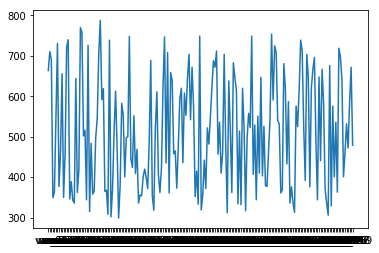

In [15]:
X = np.array(train_df.columns[2:])
y = np.array(model.feature_importances_)

plt.plot(X,y)
plt.show()

In [16]:
for idx, x in enumerate(np.argsort(y)[::-1]):
    print(idx,X[x], y[x])

0 var_34 788
1 var_21 770
2 var_22 758
3 var_146 754
4 var_99 749
5 var_133 749
6 var_53 748
7 var_76 747
8 var_13 740
9 var_165 739
10 var_40 739
11 var_6 731
12 var_26 726
13 var_148 725
14 var_12 722
15 var_190 719
16 var_110 712
17 var_166 712
18 var_1 711
19 var_78 708
20 var_149 708
21 var_33 706
22 var_92 704
23 var_169 704
24 var_115 704
25 var_191 697
26 var_174 696
27 var_2 690
28 var_67 689
29 var_108 688
30 var_121 683
31 var_154 681
32 var_184 676
33 var_109 672
34 var_198 672
35 var_94 672
36 var_173 667
37 var_179 667
38 var_0 664
39 var_80 659
40 var_9 656
41 var_177 648
42 var_139 647
43 var_170 647
44 var_122 646
45 var_18 644
46 var_91 644
47 var_192 642
48 var_81 639
49 var_118 638
50 var_107 625
51 var_75 622
52 var_127 620
53 var_172 620
54 var_87 620
55 var_155 619
56 var_36 619
57 var_123 615
58 var_164 614
59 var_44 613
60 var_71 611
61 var_89 608
62 var_86 594
63 var_35 592
64 var_147 591
65 var_157 587
66 var_197 584
67 var_48 583
68 var_180 583
69 var_186 57

In [1]:
submit_sample.drop('target', axis=1)
submit_sample['target'] = predicted
submit_sample.to_csv('lightgbm_and_add_feature_minmaxmedianstd_kmeans10.csv', index = False)

NameError: name 'submit_sample' is not defined